In [5]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
RANDOM_SEED = 42

In [6]:
data = pd.read_csv("/Users/Golnoush/Desktop/Classification/data/raw/flag_loans.csv")

In [7]:
data.sample(n=10, random_state=RANDOM_SEED)

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
2481,798820,2016-11-07,2015-09-07,NaN,NaN,NaN,NaN,7.0,region_3,6,...,16,0,0,0,14.0,550.235369,NaN,43.0,False,0
308,612648,2016-08-18,2016-02-08,NaN,NaN,NaN,NaN,1.0,region_6,12,...,0,2,0,0,6.0,NaN,576.875277,26.0,False,0
2414,452498,2016-04-20,2016-03-12,NaN,NaN,NaN,NaN,0.0,region_2,12,...,0,2,1,0,1.0,561.999471,NaN,28.0,True,1
2720,580963,2016-07-22,2015-08-14,NaN,NaN,NaN,NaN,1.0,region_6,26,...,5,6,0,0,10.0,590.376406,NaN,30.0,False,0
463,518998,2016-06-01,2015-09-29,NaN,NaN,NaN,NaN,1.0,region_3,6,...,8,0,0,0,8.0,593.493342,NaN,47.0,False,0
1185,295047,2015-12-23,2015-12-22,NaN,NaN,NaN,NaN,NaN,region_2,6,...,0,0,0,0,NaN,NaN,NaN,19.0,False,0
96,247067,2015-11-17,2015-10-15,NaN,NaN,NaN,NaN,0.0,region_3,12,...,0,0,0,0,1.0,601.979112,NaN,27.0,False,1
2031,388069,2016-03-16,2015-10-10,NaN,NaN,NaN,NaN,1.0,region_3,6,...,2,0,0,0,3.0,NaN,NaN,24.0,False,0
1886,736698,2016-10-16,2015-10-16,2.0,1.0,0.0,2015-12-20,2.0,region_6,6,...,5,0,0,0,5.0,NaN,NaN,20.0,False,1
843,628262,2016-08-28,2015-08-08,NaN,NaN,NaN,NaN,1.0,region_3,38,...,3,0,0,0,3.0,634.387608,NaN,46.0,False,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loanKey              4157 non-null   int64  
 1   rep_loan_date        4157 non-null   object 
 2   first_loan           4157 non-null   object 
 3   dpd_5_cnt            675 non-null    float64
 4   dpd_15_cnt           675 non-null    float64
 5   dpd_30_cnt           675 non-null    float64
 6   first_overdue_date   675 non-null    object 
 7   close_loans_cnt      4142 non-null   float64
 8   federal_district_nm  4146 non-null   object 
 9   TraderKey            4157 non-null   int64  
 10  payment_type_0       4157 non-null   int64  
 11  payment_type_1       4157 non-null   int64  
 12  payment_type_2       4157 non-null   int64  
 13  payment_type_3       4157 non-null   int64  
 14  payment_type_4       4157 non-null   int64  
 15  payment_type_5       4157 non-null   i

In [9]:
# Manually selecting numerical col ignoring target
data[[
    "dpd_5_cnt",
    "dpd_15_cnt",
    "dpd_30_cnt",
    "close_loans_cnt",
    "payment_type_0",
    "payment_type_1",
    "payment_type_2",
    "payment_type_3",
    "payment_type_4",
    "payment_type_5",
    "past_billings_cnt",
    "score_1",
    "score_2",
    "age"
]].describe()

,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age
count,675.000000,675.000000,675.000000,4142.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.0,3909.000000,3507.000000,239.000000,4157.000000
mean,1.444444,0.733333,0.280000,1.184693,0.018523,0.596103,3.755834,0.758239,0.019485,0.0,4.979023,578.911345,552.546610,34.561222
std,0.900599,0.764572,0.502339,1.723715,0.330359,2.564887,3.810703,2.212487,0.245960,0.0,3.491556,48.989869,21.492840,10.834143
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,384.220628,485.874267,18.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2.000000,547.429791,535.545724,26.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,4.000000,588.531315,556.757944,32.000000
75%,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,6.000000,612.323090,567.608057,41.000000
max,7.000000,5.000000,3.000000,31.000000,15.000000,81.000000,33.000000,35.000000,7.000000,0.0,21.000000,691.528420,603.311653,74.000000


In [10]:
# Categorical col
data[[
    "federal_district_nm",
    "gender"
]].describe()

,federal_district_nm,gender
count,4146,4157
unique,8,2
top,region_3,False
freq,1595,3570


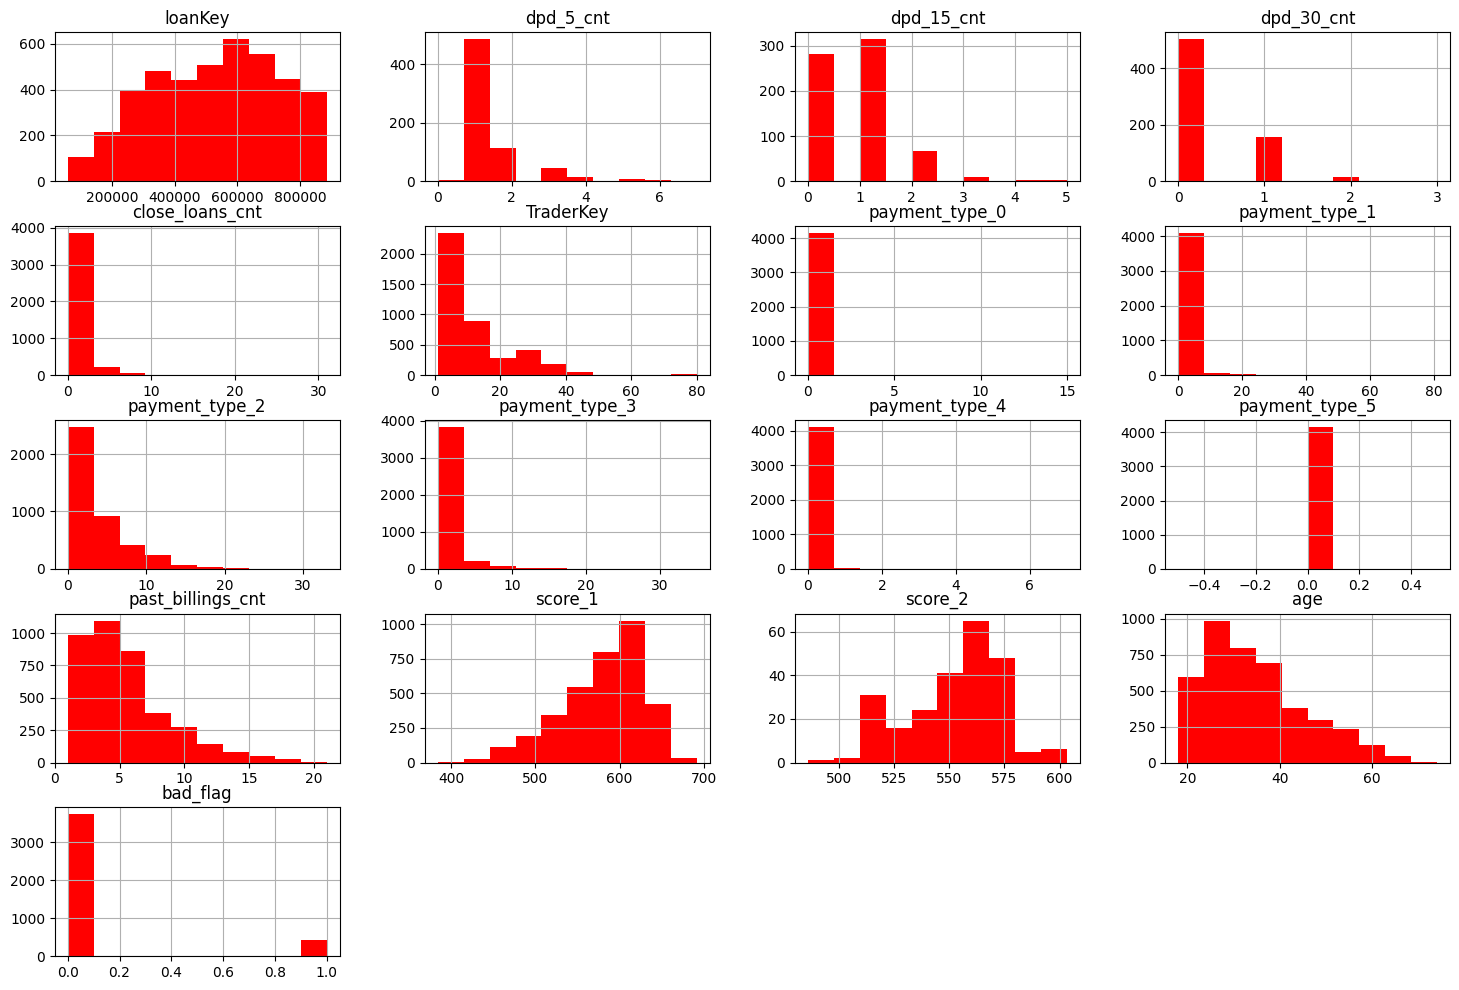

In [11]:
_ = data.hist(figsize=(18, 12), color="red")

In [12]:
# target variable distribution
data["bad_flag"].value_counts()

bad_flag
0    3740
1     417
Name: count, dtype: int64

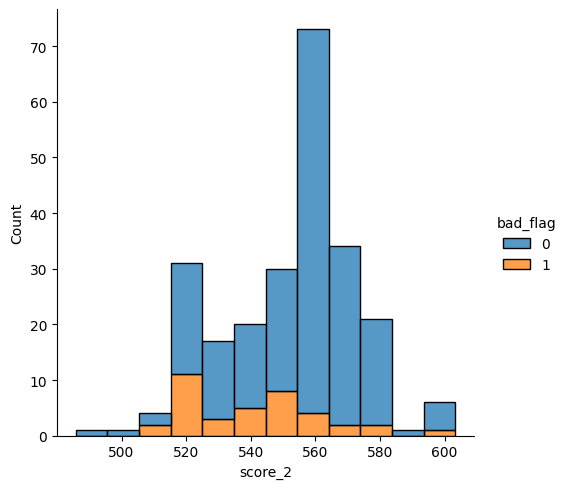

In [13]:
from seaborn import displot

_ = displot(data=data, x="score_2", hue="bad_flag", multiple="stack")

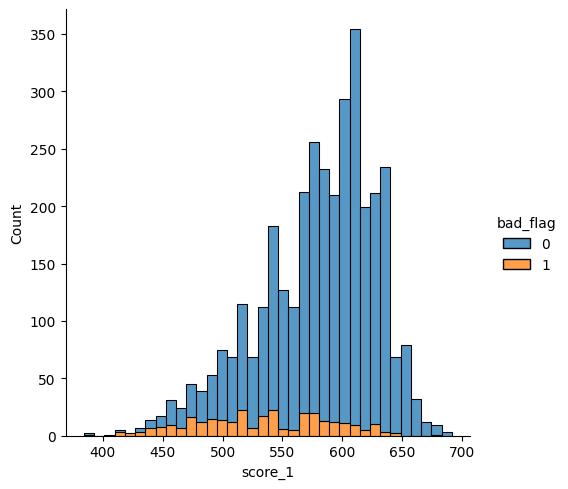

In [14]:
_ = displot(data=data, x="score_1", hue="bad_flag", multiple="stack")

Feature Engineering
calculating difference in days between the first and the repeated loan


In [ ]:
data[["rep_loan_date", "first_loan"]] = data[["rep_loan_date", "first_loan"]].apply(pd.to_datetime)
data["days_between_rep_and_first_loan"] = (data["rep_loan_date"] - data["first_loan"]).dt.days


In [16]:
data

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,...,10,0,0,0,10.0,NaN,NaN,21.0,False,0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,6,0,0,0,5.0,NaN,NaN,20.0,False,0
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,...,0,5,0,0,5.0,NaN,NaN,19.0,False,0
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,...,4,0,0,0,6.0,NaN,NaN,21.0,False,0
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,...,0,0,0,0,3.0,NaN,NaN,33.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,533637,2016-06-11,2016-05-17,NaN,NaN,NaN,NaN,0.0,region_5,7,...,1,0,0,0,NaN,NaN,563.089780,26.0,False,0
4153,596156,2016-08-06,2016-03-11,NaN,NaN,NaN,NaN,1.0,region_2,12,...,4,0,0,0,3.0,NaN,576.875277,38.0,False,1
4154,645359,2016-09-05,2016-04-30,NaN,NaN,NaN,NaN,1.0,region_2,12,...,4,0,0,0,4.0,NaN,554.816921,21.0,False,0
4155,730681,2016-10-14,2016-05-20,NaN,NaN,NaN,NaN,0.0,region_6,7,...,4,0,0,0,4.0,NaN,563.089780,35.0,False,0


Data manipulation for the categorical data
gender mapping to 0 and 1
federal regions one hot encoding with get_dummies()

In [17]:
federal_districts = pd.get_dummies(data["federal_district_nm"], prefix="federal")

In [18]:
federal_districts


,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...
4152,False,False,False,False,False,True,False,False
4153,False,False,True,False,False,False,False,False
4154,False,False,True,False,False,False,False,False
4155,False,False,False,False,False,False,True,False


In [20]:
data = pd.concat(objs=[data, federal_districts], axis=1)

In [21]:
# replacing nans with zero
data.fillna(value=0, inplace=True)

In [22]:
data.head(10)

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,gender,bad_flag,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7
0,708382,2016-10-06,2015-11-13,0.0,0.0,0.0,0,3.0,region_6,6,...,False,0,False,False,False,False,False,False,True,False
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,False,0,False,False,False,False,False,False,True,False
2,779736,2016-10-30,2015-12-21,0.0,0.0,0.0,0,2.0,region_1,6,...,False,0,False,True,False,False,False,False,False,False
3,556376,2016-06-29,2015-06-30,0.0,0.0,0.0,0,1.0,region_6,14,...,False,0,False,False,False,False,False,False,True,False
4,266968,2015-12-01,2015-08-03,0.0,0.0,0.0,0,0.0,region_5,22,...,False,0,False,False,False,False,False,True,False,False
5,697186,2016-10-01,2015-08-30,0.0,0.0,0.0,0,2.0,region_3,38,...,False,0,False,False,False,True,False,False,False,False
6,347907,2016-02-18,2015-06-07,1.0,0.0,0.0,2015-11-06,2.0,region_3,6,...,False,0,False,False,False,True,False,False,False,False
7,256097,2015-11-23,2015-06-04,1.0,1.0,0.0,2015-11-06,0.0,region_3,6,...,False,1,False,False,False,True,False,False,False,False
8,670540,2016-09-19,2015-12-03,3.0,1.0,0.0,2016-01-15,1.0,region_2,6,...,False,0,False,False,True,False,False,False,False,False
9,254453,2015-11-22,2015-06-04,1.0,1.0,0.0,2015-11-06,0.0,region_3,6,...,False,1,False,False,False,True,False,False,False,False


In [ ]:
# Predicting which customer is bad